## DATA CHALLENGE

### Abstract

The City of Goodeats is looking for ways to improve 1) how it conducts food safety inspections for food
establishments (e.g. restaurants); and 2) how food establishments perform on the inspections. The
Commissioner has come to you for help. She has provided you with two datasets: “food establishment
violations” and “food establishment grades.” “Food establishment violations” records every violation for
every inspection on every food establishment in the City (e.g. level=restaurant—inspection—violation).
&quot;Food establishment grades” scores each inspection based on the number and severity of the violations
observed and presents a score and grade for each inspection performed (level=restaurant—inspection).
The Commissioner would like you to use the data to generate insights into the City’s inspection process
and/or inspection results that she can use to make improvements. Please choose one (1) of the bullets
below and answer the questions using one or both datasets

Prepare a brief memo or presentation for the Commissioner. Include a short explanation of how you
approached the question(s), a statement of your main finding(s), and a set of data visualizations that
show your analysis. You may visualize your analysis in the form of charts, graphs, tables, or any other
medium(s) you choose and use any tools or applications you wish, but please complete any coding work
in either R or Python.

### Options

-What changes, if any, would you make to the scoring/grading system to better reflect inspection
performance?


### ASSESMENT NOTES

The current scoring methodology works as follows. Establishments all start with a grade of 100, and are docked from that 100 score for each violation. So a restaurant with violations totalling 10 would have a total score of 90 (100 - 10 = 90). 

The vast majority of establishments are scoring 100

The gradind rubric is as follows:
greater than 94 = A
81 to 93 = B
80 and below = C

The data suggests that the only way to pass your health inspection is by getting an A. Only one establishment scored a B who also passed their health inspection.

There are three levels of violations, which break out as follows.

foodborne critical violation (3) = 10 points deducted

critical violation (2) = 7 points deducted

non-critical violation (1) = 2 points deducted

324898 total violations
71.1% of violations are level 1
5.9% of violations are level 2
22.9% of violations are level 3

a foodbourne critical ilness is more likely than others to contribute to food contamination, illness, or environmental health hazard. These kind of violations include things like the mishandling of food during storage/preparation and cleanliness/hygiene concerns. These are the most serious violations and pose the most risk to the public health.

If an establishment has one critical violation they will not recieve and A score, and will not pass their health inspection test. 

This begs the question why there is any kind of letter grade in the first place. If an A grade is the only score that will allow you to pass your inspection, and even one critical violation will dock your score enough to put you out of the passing range.

It would be my reccomendation to simplify the scoring system into a pass/fail methodology. The threshold for passing or failing would be the same as receiving an A (a 93). That is to say that the only way to pass your health inspection is to get a A. 




In [3]:
import pandas as pd
import numpy  as np
import sklearn
import matplotlib as plt

In [4]:
grades = pd.read_csv('C:/Users/morrison/Desktop/data challenge/food+establishment+grades.csv')

In [5]:
violations = pd.read_csv('C:/Users/morrison/Desktop/data challenge/food+establishment+violations.csv')

In [6]:
grades.head()

,LICENSENO,ISSDTTM,EXPDTTM,LICSTATUS,LICENSECAT,DESCRIPT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE
0,77958,3/14/2012 9:17,12/31/2012 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_Pass,1/3/2012 7:26,0,100,A
1,74470,2/1/2012 12:29,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 9:42,6,94,A
2,18086,12/27/2011 12:46,12/31/2011 23:59,Inactive,RF,Retail Food,HE_Fail,1/3/2012 10:06,6,94,A
3,77035,1/26/2012 11:01,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,1/3/2012 10:07,12,88,B
4,20285,2/24/2012 14:46,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 10:32,2,98,A


In [14]:
#changing some column headers to make them a bit easier to work with
grades = grades.rename(columns={'LICENSENO':'license_id','ISSDTTM':'license_issued_date', 'EXPDTTM':'license_exp_date', 'LICSTATUS':'license_status', 'LICENSECAT':'license_cat', 'DESCRIPT':'description', 'RESULT':'result', 'RESULTDTTM':'result_date', 'SUM_VIOLATION': 'sum_violations'})

In [8]:
grades.head()

,license_id,license_issued_date,license_exp_date,license_status,license_cat,description,result,result_date,SUM_VIOLATIONS,SCORE,GRADE
0,77958,3/14/2012 9:17,12/31/2012 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_Pass,1/3/2012 7:26,0,100,A
1,74470,2/1/2012 12:29,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 9:42,6,94,A
2,18086,12/27/2011 12:46,12/31/2011 23:59,Inactive,RF,Retail Food,HE_Fail,1/3/2012 10:06,6,94,A
3,77035,1/26/2012 11:01,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,1/3/2012 10:07,12,88,B
4,20285,2/24/2012 14:46,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 10:32,2,98,A


SUM_VIOLATIONS is the total sum of the point the food establishment receieved in violations. So a score of 0 means there were zero violations. 
the scoring methodology seems to be that each establishment starts with a score of 100 and are docked the SUM_VIOLATIONS based upon their food violations.
This is why there are negative numbers; some establisments have had a SUM_VIOLATIONS of greater that 100. 

In [9]:
violations.head()

,LICENSENO,ISSDTTM,EXPDTTM,LICSTATUS,LICENSECAT,DESCRIPT,RESULT,RESULTDTTM,VIOLATION,VIOLLEVEL,VIOLDESC,VIOLDTTM,VIOLSTATUS,PROPERTY_ID,LOCATION
0,77958,3/14/2012 9:17,12/31/2012 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_Pass,1/3/2012 7:26,NaN,NaN,NaN,,NaN,155968.0,"(42.355863000, -71.061898000)"
1,74470,2/1/2012 12:29,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 9:42,15-4-202.16,*,Non-Food Contact Surfaces,1/3/2012 9:42,Fail,48511.0,"(42.278028000, -71.066046000)"
2,74470,2/1/2012 12:29,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 9:42,36-6-501.11-.12,*,Improper Maintenance of Floors,1/3/2012 9:42,Fail,48511.0,"(42.278028000, -71.066046000)"
3,74470,2/1/2012 12:29,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 9:42,37-6-501.11-.12,*,Improper Maintenance of Walls/Ceilings,1/3/2012 9:42,Fail,48511.0,"(42.278028000, -71.066046000)"
4,18086,12/27/2011 12:46,12/31/2011 23:59,Inactive,RF,Retail Food,HE_Fail,1/3/2012 10:06,23-4-602.13,*,Non-Food Contact Surfaces Clean,1/3/2012 10:06,Fail,14788.0,"(42.382370000, -71.018390000)"


In [57]:
violations.RESULT.value_counts()

HE_Fail       136721
HE_Pass        98697
HE_Filed       38101
HE_FailExt     26452
HE_Hearing     12788
HE_NotReq       7505
HE_TSOP         3570
HE_OutBus        646
HE_Closure       346
HE_FAILNOR        39
HE_Misc           27
Pass               6
Name: RESULT, dtype: int64

In [59]:
#mapping the 'stars' in violation level to numbers
violations['violation_level'] = violations['VIOLLEVEL'].map(lambda x: 1 if x =='*' else 2 if x =='**' else 3 )
violations.head(100)

,LICENSENO,ISSDTTM,EXPDTTM,LICSTATUS,LICENSECAT,DESCRIPT,RESULT,RESULTDTTM,VIOLATION,VIOLLEVEL,VIOLDESC,VIOLDTTM,VIOLSTATUS,PROPERTY_ID,LOCATION,violation_level
0,77958,3/14/2012 9:17,12/31/2012 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_Pass,1/3/2012 7:26,NaN,NaN,NaN,,NaN,155968.0,"(42.355863000, -71.061898000)",3
1,74470,2/1/2012 12:29,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 9:42,15-4-202.16,*,Non-Food Contact Surfaces,1/3/2012 9:42,Fail,48511.0,"(42.278028000, -71.066046000)",1
2,74470,2/1/2012 12:29,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 9:42,36-6-501.11-.12,*,Improper Maintenance of Floors,1/3/2012 9:42,Fail,48511.0,"(42.278028000, -71.066046000)",1
3,74470,2/1/2012 12:29,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 9:42,37-6-501.11-.12,*,Improper Maintenance of Walls/Ceilings,1/3/2012 9:42,Fail,48511.0,"(42.278028000, -71.066046000)",1
4,18086,12/27/2011 12:46,12/31/2011 23:59,Inactive,RF,Retail Food,HE_Fail,1/3/2012 10:06,23-4-602.13,*,Non-Food Contact Surfaces Clean,1/3/2012 10:06,Fail,14788.0,"(42.382370000, -71.018390000)",1
5,18086,12/27/2011 12:46,12/31/2011 23:59,Inactive,RF,Retail Food,HE_Fail,1/3/2012 10:06,36-6-201.11,*,Floors Designed Constructed Installed,1/3/2012 10:06,Fail,14788.0,"(42.382370000, -71.018390000)",1
6,18086,12/27/2011 12:46,12/31/2011 23:59,Inactive,RF,Retail Food,HE_Fail,1/3/2012 10:06,42-6-501.113/.114,*,Premises Maintained,1/3/2012 10:06,Fail,14788.0,"(42.382370000, -71.018390000)",1
7,77035,1/26/2012 11:01,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,1/3/2012 10:07,15-4-202.16,*,Non-Food Contact Surfaces,1/3/2012 10:07,Fail,156956.0,"(42.330463000, -71.067234000)",1
8,77035,1/26/2012 11:01,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,1/3/2012 10:07,23-4-602.13,*,Non-Food Contact Surfaces Clean,1/3/2012 10:07,Fail,156956.0,"(42.330463000, -71.067234000)",1
9,77035,1/26/2012 11:01,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,1/3/2012 10:07,29-5-201/02.11,*,Installed and Maintained,1/3/2012 10:07,Fail,156956.0,"(42.330463000, -71.067234000)",1


In [74]:
violations.dtypes

LICENSENO            int64
ISSDTTM             object
EXPDTTM             object
LICSTATUS           object
LICENSECAT          object
DESCRIPT            object
RESULT              object
RESULTDTTM          object
VIOLATION           object
VIOLLEVEL           object
VIOLDESC            object
VIOLDTTM            object
VIOLSTATUS          object
PROPERTY_ID        float64
LOCATION            object
violation_level      int64
dtype: object

In [77]:
#crosstab showing how many violations, for each level of serverity, occured for each health inspection result
violations_cross = pd.crosstab(index=violations.violation_level, columns=violations.RESULT)
violations_cross

RESULT,HE_Closure,HE_FAILNOR,HE_Fail,HE_FailExt,HE_Filed,HE_Hearing,HE_Misc,HE_NotReq,HE_OutBus,HE_Pass,HE_TSOP,Pass
violation_level,,,,,,,,,,,,
1,196,32,102342,19690,32439,9066,3,204,281,64618,2200,0
2,17,2,8843,1626,1583,800,1,16,22,5989,278,0
3,133,5,25536,5136,4079,2922,23,7285,343,28090,1092,6


In [114]:
#average scores and violation penalties for each health inspection result
grades.groupby(by='result').mean()

,license_id,SUM_VIOLATIONS,SCORE
result,,,
HE_Fail,59282.538886,24.073380,75.926620
HE_FailExt,56707.546439,10.425008,89.574992
HE_Filed,55653.247556,3.207611,96.792389
HE_Hearing,60516.131542,19.696605,80.303395
HE_NotReq,39834.792344,0.019278,99.980722
HE_OutBus,56764.759375,3.265625,96.734375
HE_Pass,63459.464652,0.000486,99.999514
HE_TSOP,71695.144444,39.184444,60.815556


In [78]:
#amount of each grade issued within each health inspection result
pd.crosstab(index=grades.result, columns=grades.GRADE)

GRADE,A,B,C
result,,,
HE_Fail,2405,8411,10593
HE_FailExt,1476,1132,439
HE_Filed,9295,213,5
HE_Hearing,306,600,508
HE_NotReq,7259,2,1
HE_OutBus,290,12,18
HE_Pass,28827,1,0
HE_TSOP,79,108,263


HE_Pass = Inspection Passed


HE_Fail = Inspection Failed

HE_FailExt = Re-inspection Failed

HE_Filed = Inspection did not pass but inspector declines to re-inspect

HE_TSOP = Restaurant temporarily shut down by order of Health Department

HE_Hearing = Establishment must have hearing to determine whether it can reopen/keep its license

HE_OutBus = The establishment has gone out of business

HE_NotReq = The inspection is not required

GRADE
A    AxesSubplot(0.125,0.125;0.775x0.755)
B    AxesSubplot(0.125,0.125;0.775x0.755)
C    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SCORE, dtype: object

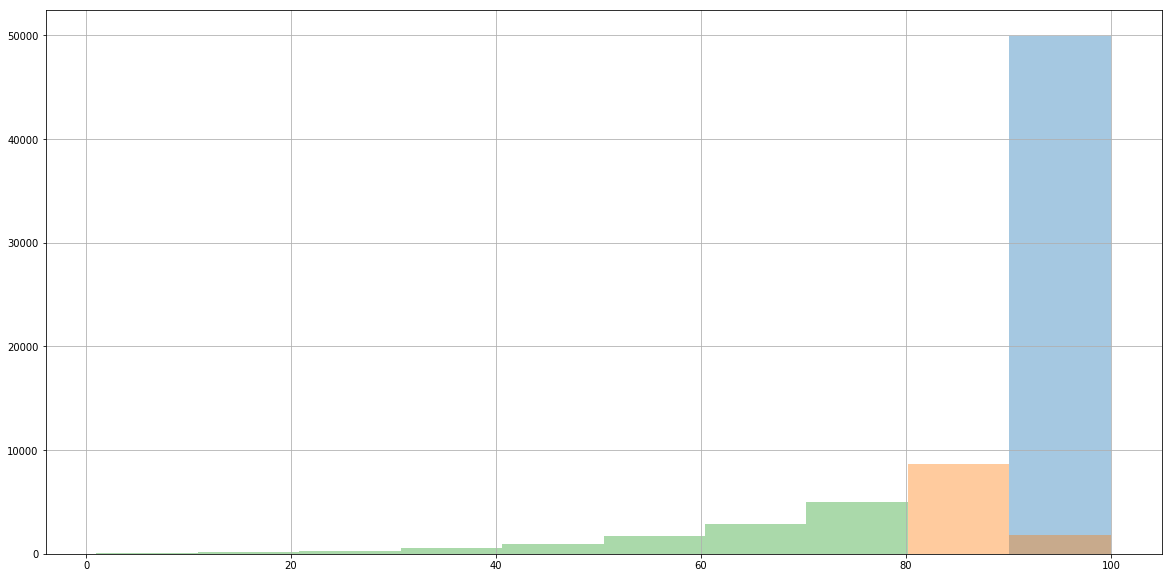

In [80]:
#stacked histogram for the distribution of each letter grade
grades.groupby('GRADE').SCORE.hist(alpha=0.4,figsize=(20,10), stacked=True, bins=10, range=[1,100], label='GRADE')